In [1]:
import re
import nltk
import string
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE

# Certifique-se de ter as bibliotecas necessárias
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Estela\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Estela\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [2]:
# Função para carregar o texto (supondo um arquivo de texto)
def load_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

In [18]:
def load_and_preprocess_text(file_path):
    # Ler o arquivo .txt com codificação utf-8
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.readlines()  # Lê linha por linha, trata cada linha como um "documento"
    
    # Limpeza e pré-processamento (caso necessário)
    clean_data = [clean_text(line) for line in text]  # Use a função clean_text que você já tem
    return clean_data

In [3]:
# Função para limpar o texto
def clean_text(text):
    # Converter para minúsculas
    text = text.lower()
    
    # Remover URLs
    text = re.sub(r'http\S+', '', text)
    
    # Remover números
    text = re.sub(r'\d+', '', text)
    
    # Remover pontuação
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remover stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    
    # Juntar palavras novamente
    return ' '.join(words)

In [4]:
# Função para tokenizar o texto
def tokenize_text(text):
    return nltk.word_tokenize(text)

In [5]:
# Função para gerar uma matriz de termos (usando TF-IDF)
def generate_tfidf_matrix(text_data):
    tfidf = TfidfVectorizer()
    tfidf_matrix = tfidf.fit_transform(text_data)
    return tfidf_matrix, tfidf.get_feature_names_out()

In [6]:
# Função para reduzir dimensionalidade com t-SNE e visualizar
def visualize_with_tsne(tfidf_matrix, words):
    tsne = TSNE(n_components=2, random_state=42)
    Z = tsne.fit_transform(tfidf_matrix.toarray())
    
    plt.figure(figsize=(10, 8))
    plt.scatter(Z[:, 0], Z[:, 1], alpha=0.7)
    
    for i, word in enumerate(words):
        plt.annotate(word, (Z[i, 0], Z[i, 1]), fontsize=8, alpha=0.7)
    
    plt.title("t-SNE Visualization of Words")
    plt.show()

In [26]:
# Pipeline Simplificada
def run_pipeline(file_path):
    # 1. Carregar o texto
    text = load_text(file_path)
    print(text[:100])
    print('---')
    
    # 2. Limpar o texto
    clean_data = load_and_preprocess_text(file_path)
    print(clean_data[:100])
    print('---')
    # Filtrar as strings vazias
    clean_data = [text for text in clean_data if text.strip() != '']
    print(clean_data[:100])
    print('---')

    # 3. Tokenizar
    # Concatenar todas as linhas para formar um único texto
    concatenated_text = ' '.join(clean_data)  # Junta as linhas em uma string
    sentences = tokenize_text(concatenated_text)  # Tokeniza o texto completo
    print(len(sentences))  # Exibe a quantidade de sentenças
    print('---')
    
    # 4. Gerar a matriz TF-IDF
    # Passe clean_data diretamente
    tfidf_matrix, words = generate_tfidf_matrix(clean_data)
    # Verificar as dimensões da matriz esparsa
    print(f"Dimensões da matriz TF-IDF: {tfidf_matrix.shape}")
    print(f"Número de palavras: {len(words)}")
    print('---')
    print(f"Número de documentos: {tfidf_matrix.shape[0]}")
    print(f"Número de palavras (termos): {tfidf_matrix.shape[1]}")
    print('---')
    
    # 5. Visualizar com t-SNE
    visualize_with_tsne(tfidf_matrix, words)


﻿The Project Gutenberg eBook of Little Women; Or, Meg, Jo, Beth, and Amy
    
This ebook is for the 
---
['\ufeffthe project gutenberg ebook little women meg jo beth amy', '', 'ebook use anyone anywhere united states', 'parts world cost almost restrictions', 'whatsoever may copy give away reuse terms', 'project gutenberg license included ebook online', 'wwwgutenbergorg located united states', 'check laws country located', 'using ebook', '', 'title little women meg jo beth amy', '', '', 'author louisa may alcott', '', 'illustrator frank merrill', '', 'release date august ebook', 'recently updated may', '', 'language english', '', 'credits david edwards ernest schaal robert homa online distributed proofreading team', '', '', 'start project gutenberg ebook little women meg jo beth amy', '', '', '', 'illustration little women', 'meg jo beth amy', 'louisa alcott', '', '', '', '', 'little women', '', '', 'illustration drew fire mother big chair', 'beth feet', 'see page frontispiece', '', '',

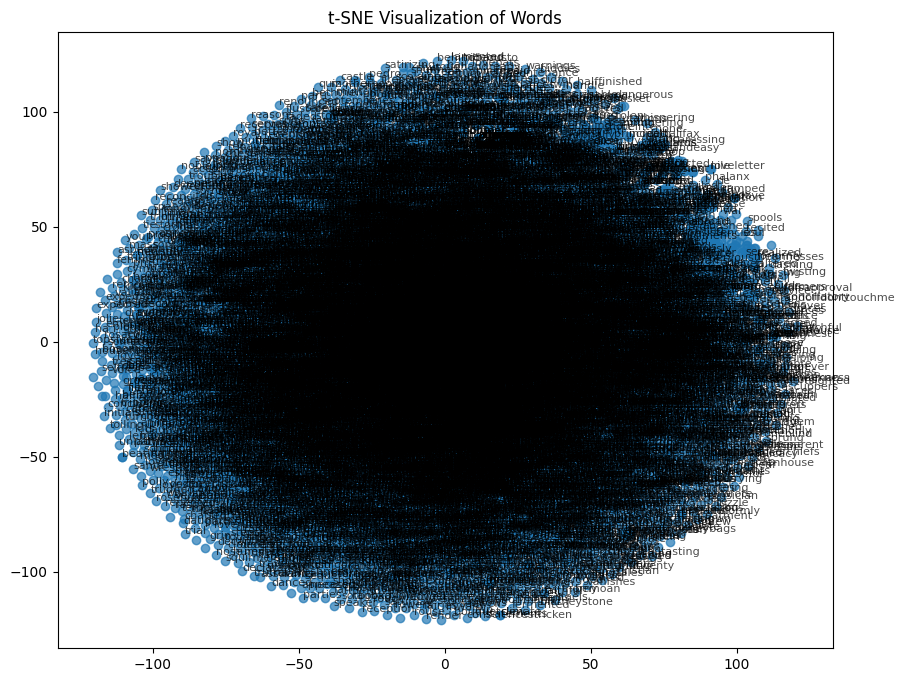

In [27]:
# Caminho para o arquivo de texto
# FILE: www.kaggle.com/datasets/hakim11/txt-data-for-nlp-task
file_path = 'LSTM.txt'  # Substitua pelo caminho do seu arquivo

# Executar a pipeline
run_pipeline(file_path)